## Minería de Datos - Trabajo 1 Clasificación Supervisada
### Carlos Martínez Rodríguez

#### Acerca del dataset

La data utilizada para este proyecto fue extraída de Kaggle, en el apartado de competencias con el nombre de "House Prices" toda la información fue recopilada por Dean De Cock, con el propósito de fomentar el estudio de la Ciencia de Datos.


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno
from scipy import stats
from scipy.stats import norm, skew

### Metodología

#### Preparación de los datos que serán utilizados para los filtros y modelos

In [2]:
print(os.listdir('./data'))
train_data = pd.read_csv('./data/train.csv')
train = train_data.copy()

['test.csv', 'data_description.txt', 'train.csv', 'sample_submission.csv']


In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_id = train['Id']
train.drop("Id", axis = 1, inplace = True)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


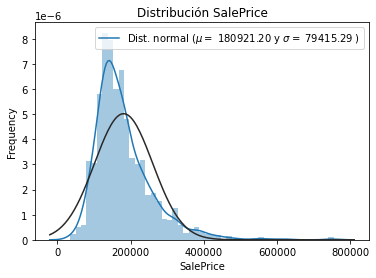

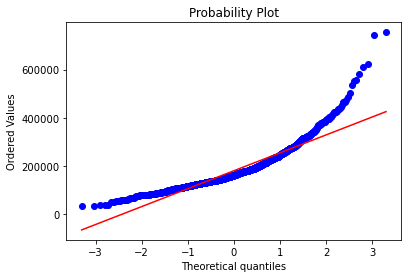

In [5]:
sns.distplot(train['SalePrice'] , fit=norm)
[mu, sigma] = norm.fit(train['SalePrice'])
plt.legend(['Dist. normal ($\mu=$ {:.2f} y $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Distribución SalePrice')
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

Este dataset es parte de una competencia de Kaggle por lo que cuenta con dos datasets uno para generar los modelos y otro para llevar a cabo las pruebas. Es importante mencionarlo debido a que si se elimina alguna variable o se cambia el tipo de valor de otra el mismo cambio se deberá de hacer en el dataset de pruebas.

Se debe de aplicar la misma limpieza de datos a ambos datasets, de lo contrario habría valores distintos en la data que se utiliza para entrenar los modelos y con lo que se harán las pruebas.

In [6]:
y_train_data = train.SalePrice.values
train.drop(['SalePrice'], axis=1, inplace=True)
print("train size is : {}".format(train.shape))

train size is : (1460, 79)


In [7]:
print("El valor promedio de las propiedades:", np.average(y_train_data), "\nLa prpiedad con menor precio", min(y_train_data), "\nLa propiedad con mayor precio", max(y_train_data))

El valor promedio de las propiedades: 180921.19589041095 
La prpiedad con menor precio 34900 
La propiedad con mayor precio 755000


In [8]:
numeric_columns = train.select_dtypes(include=['int64','float64'])
numeric_columns.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [9]:
object_columns = train.select_dtypes(include='object')
object_columns.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [10]:
print("Número de variables numéricas: {0}".format(len(numeric_columns.columns)))
print("Número de variables categóricas: {0}".format(len(object_columns.columns)))
print("Total de variables: {0}".format(len(numeric_columns.columns) + len(object_columns.columns)))

Número de variables numéricas: 36
Número de variables categóricas: 43
Total de variables: 79


#### Manejo de datos faltantes

<AxesSubplot:>

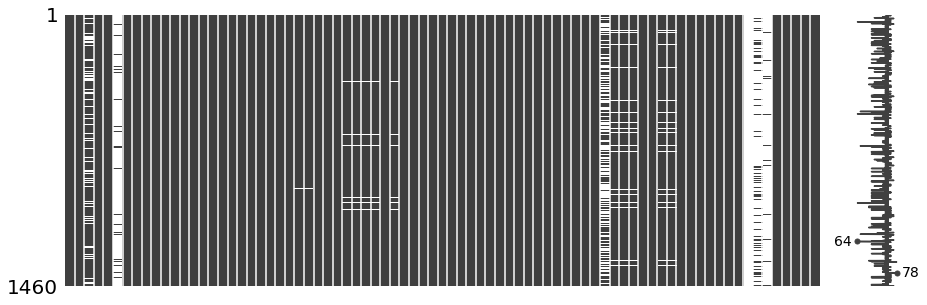

In [11]:
msno.matrix(df=train, figsize=(15,5))

In [12]:
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :train_na})

Text(0.5, 1.0, 'Porcenaje de variables faltantes')

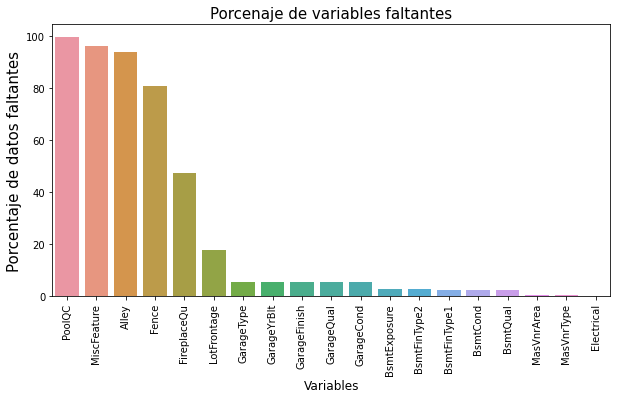

In [13]:
f, ax = plt.subplots(figsize=(10, 5))
plt.xticks(rotation='90')
sns.barplot(x=train_na.index, y=train_na)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Porcentaje de datos faltantes', fontsize=15)
plt.title('Porcenaje de variables faltantes', fontsize=15)

In [14]:
from sklearn.preprocessing import LabelEncoder

for i in range(train.shape[1]):
    if train.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(train.iloc[:,i].values))
        train.iloc[:,i] = lbl.transform(list(train.iloc[:,i].values))

In [15]:
from helpers import missing
missing.missing_values_table(train)

De: 79 columnas, 3 cuentan con valores faltantes


,Total de valores faltantes,Porcentaje de valores faltantes
LotFrontage,259,17.74
GarageYrBlt,81,5.55
MasVnrArea,8,0.55


In [16]:
train = train.drop(['LotFrontage'], axis=1)

In [17]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train[col] = train[col].fillna(0)

In [18]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train[col] = train[col].fillna(0)

In [19]:
train["MasVnrArea"] = train["MasVnrArea"].fillna(0)

In [20]:
missing.missing_values_table(train)

De: 78 columnas, 0 cuentan con valores faltantes


,Total de valores faltantes,Porcentaje de valores faltantes


<AxesSubplot:>

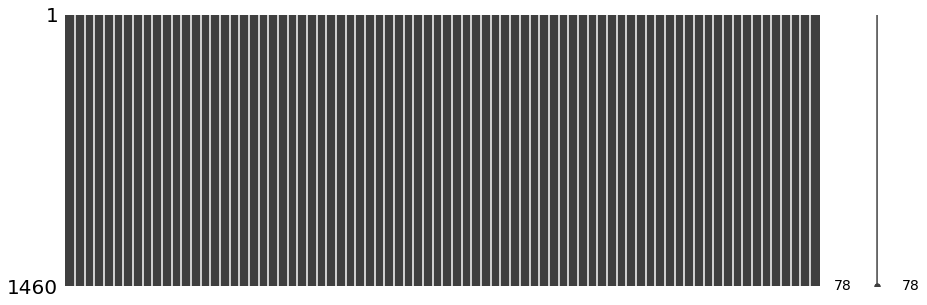

In [21]:
msno.matrix(df=train, figsize=(15,5))

In [22]:
train.shape

(1460, 78)

Convertir valores flotantes a enteros

In [23]:
numeric_columns = train.select_dtypes(include=['float64'])
train[numeric_columns.columns] = train[numeric_columns.columns].applymap(np.int64)
train.head(10)

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,8450,1,2,3,3,0,4,0,...,0,0,3,4,4,0,2,2008,8,4
1,20,3,9600,1,2,3,3,0,2,0,...,0,0,3,4,4,0,5,2007,8,4
2,60,3,11250,1,2,0,3,0,4,0,...,0,0,3,4,4,0,9,2008,8,4
3,70,3,9550,1,2,0,3,0,0,0,...,0,0,3,4,4,0,2,2006,8,0
4,60,3,14260,1,2,0,3,0,2,0,...,0,0,3,4,4,0,12,2008,8,4
5,50,3,14115,1,2,0,3,0,4,0,...,0,0,3,2,2,700,10,2009,8,4
6,20,3,10084,1,2,3,3,0,4,0,...,0,0,3,4,4,0,8,2007,8,4
7,60,3,10382,1,2,0,3,0,0,0,...,0,0,3,4,2,350,11,2009,8,4
8,50,4,6120,1,2,3,3,0,4,0,...,0,0,3,4,4,0,4,2008,8,0
9,190,3,7420,1,2,3,3,0,0,0,...,0,0,3,4,4,0,1,2008,8,4


In [24]:
print("Variables con valore continuos", len(train.select_dtypes(include=['float64']).columns))

Variables con valore continuos 0


### Filtro de Variables

A continuación se hará la seleción de variables que serán utilizadas en los distintos modelos, se 

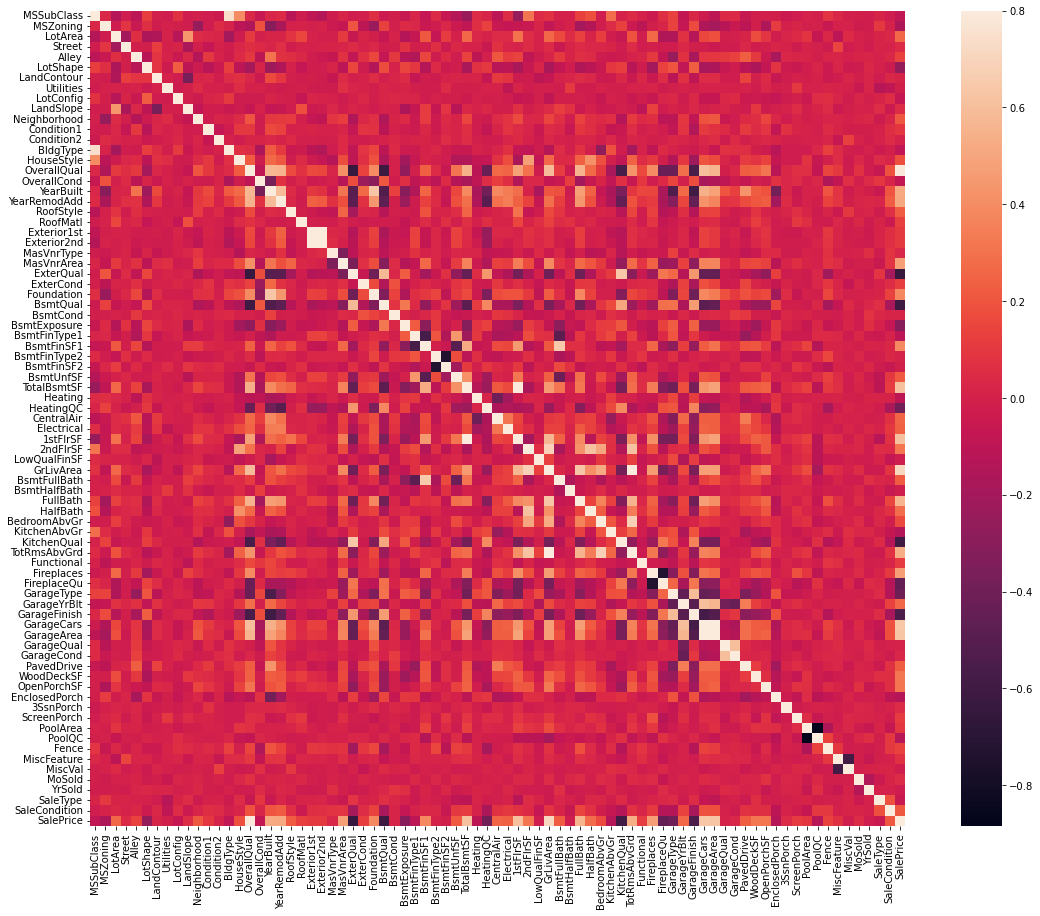

In [25]:
train["SalePrice"] = y_train_data
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, vmax=.8, square=True);

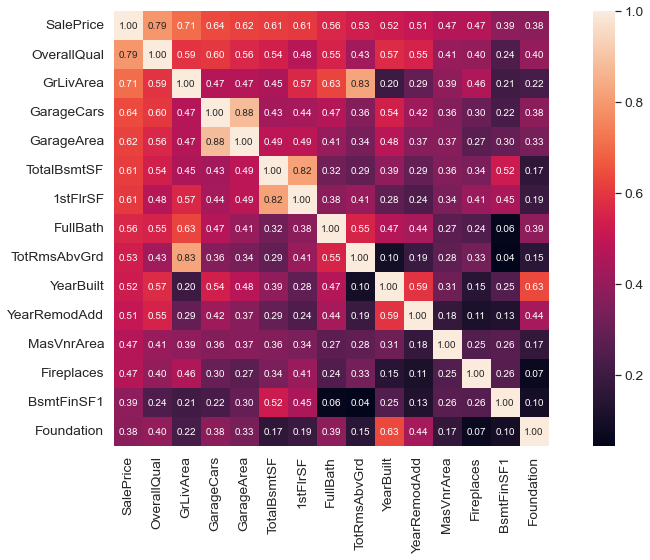

In [26]:
k = 15
plt.figure(figsize=(16,8))
corrmat = train.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [27]:
train.drop(['SalePrice'], axis=1, inplace=True)

In [28]:
cols = cols.drop("SalePrice")

In [29]:
print(cols.to_list())

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'Foundation']


#### Filtro Univariante

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, f_regression

#### Correlación de Pearson

In [31]:
fvalue_Best = SelectKBest(f_regression, k=15)
X_kbest = fvalue_Best.fit_transform(train, y_train_data)
feature_index = fvalue_Best.get_support(indices=True)
pearson_features = train.iloc[:,feature_index]

In [32]:
pearson_features.head()


,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,GarageFinish,GarageCars,GarageArea
0,7,2003,2003,196,2,2,856,856,1710,2,2,8,1,2,548
1,6,1976,1976,0,3,2,1262,1262,1262,2,3,6,1,2,460
2,7,2001,2002,162,2,2,920,920,1786,2,2,6,1,2,608
3,7,1915,1970,0,3,3,756,961,1717,1,2,7,2,3,642
4,8,2000,2000,350,2,2,1145,1145,2198,2,2,9,1,3,836


In [33]:
print(pearson_features.columns.to_list())

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'GarageFinish', 'GarageCars', 'GarageArea']


#### ANOVA (Análisis de Varianza)

Tenmos 78 variables de las cuales queremos obtener las 15 mejors, por esta razón se utilizará SelectKBest, que devuelve el k de variables con mejores scores

In [34]:
fvalue_Best = SelectKBest(f_classif, k=15)
X_kbest = fvalue_Best.fit_transform(train, y_train_data)
feature_index = fvalue_Best.get_support(indices=True)
anova_features = train.iloc[:,feature_index]

In [35]:
anova_features.head(10)

,LotArea,OverallQual,YearBuilt,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,GarageFinish,GarageCars,GarageArea,MiscVal
0,8450,7,2003,196,2,2,856,856,1710,2,2,1,2,548,0
1,9600,6,1976,0,3,2,1262,1262,1262,2,3,1,2,460,0
2,11250,7,2001,162,2,2,920,920,1786,2,2,1,2,608,0
3,9550,7,1915,0,3,3,756,961,1717,1,2,2,3,642,0
4,14260,8,2000,350,2,2,1145,1145,2198,2,2,1,3,836,0
5,14115,5,1993,0,3,2,796,796,1362,1,3,2,2,480,700
6,10084,8,2004,186,2,0,1686,1694,1694,2,2,1,2,636,0
7,10382,7,1973,240,3,2,1107,1107,2090,2,3,1,2,484,350
8,6120,7,1931,0,3,3,952,1022,1774,2,3,2,2,468,0
9,7420,5,1939,0,3,3,991,1077,1077,1,3,1,1,205,0


#### Filtro Multivariante

#### LASSO - Least Absolute Shrinkage and Selection Operator

Vamos a realizar la selección de variables utilizando el método de Lasso

In [36]:
from sklearn.preprocessing import scale
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel


In [37]:
X_train_scaled = scale(train)
lasso = LassoCV().fit(X_train_scaled, y_train_data)

In [38]:
select_lassocv = SelectFromModel(LassoCV(), threshold=1e-5)
select_lassocv.fit(train, y_train_data)
lasso_indexes = select_lassocv.get_support(indices=True)
lasso_features =  train.iloc[:, lasso_indexes]
lasso_features.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,MiscVal
0,8450,2003,2003,196,706,856,854,1710,2003,548,0,0
1,9600,1976,1976,0,978,1262,0,1262,1976,460,298,0
2,11250,2001,2002,162,486,920,866,1786,2001,608,0,0
3,9550,1915,1970,0,216,756,756,1717,1998,642,0,0
4,14260,2000,2000,350,655,1145,1053,2198,2000,836,192,0


In [39]:
print(lasso_features.columns.to_list())

['LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'MiscVal']


#### Wrapper

#### Forward selection
Starts with one predictor and adds more iteratively. At each subsequent iteration, the best of the remaining original predictors are added based on performance criteria.

In [40]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression

In [41]:
train_cols_length = len(train.columns)
sfs = SFS(LinearRegression(),
           k_features= len(train.columns),
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
sfs.fit(train, y_train_data)


SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=78,
                          scoring='r2')

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


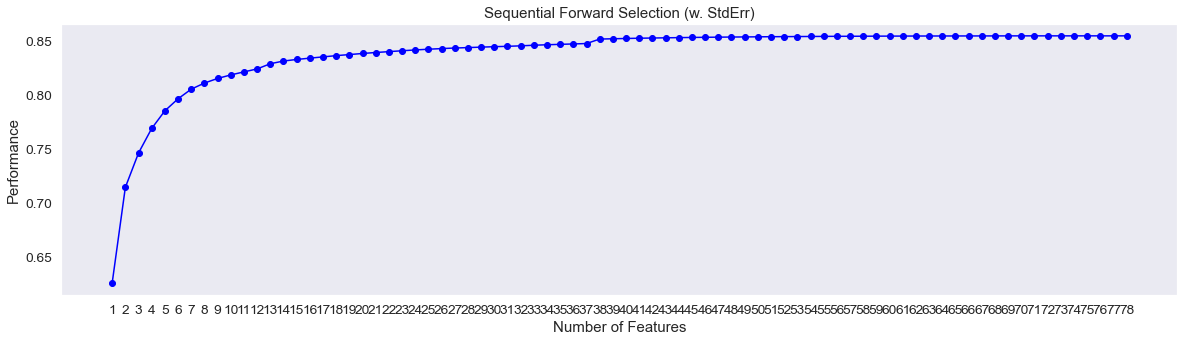

In [42]:
fig = plot_sfs(sfs.get_metric_dict(), figsize=(20,5), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [43]:
sfs_with_k = SFS(LinearRegression(),
           k_features= 13,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
sfs_with_k.fit(train, y_train_data)

df_SFS_results = pd.DataFrame(sfs_with_k.subsets_).transpose()
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(15,)",[0.6256518924621182],0.625652,"(OverallQual,)"
2,"(15, 44)",[0.7141732234458849],0.714173,"(OverallQual, GrLivArea)"
3,"(15, 32, 44)",[0.7459489724668781],0.745949,"(OverallQual, BsmtFinSF1, GrLivArea)"
4,"(15, 25, 32, 44)",[0.7686903276646005],0.76869,"(OverallQual, ExterQual, BsmtFinSF1, GrLivArea)"
5,"(15, 25, 32, 44, 59)",[0.7850192471247317],0.785019,"(OverallQual, ExterQual, BsmtFinSF1, GrLivArea..."
6,"(0, 15, 25, 32, 44, 59)",[0.7961443132794511],0.796144,"(MSSubClass, OverallQual, ExterQual, BsmtFinSF..."
7,"(0, 15, 25, 28, 32, 44, 59)",[0.8050615185287505],0.805062,"(MSSubClass, OverallQual, ExterQual, BsmtQual,..."
8,"(0, 15, 25, 28, 32, 44, 51, 59)",[0.8107117039078258],0.810712,"(MSSubClass, OverallQual, ExterQual, BsmtQual,..."
9,"(0, 15, 25, 28, 30, 32, 44, 51, 59)",[0.8149607915899528],0.814961,"(MSSubClass, OverallQual, ExterQual, BsmtQual,..."
10,"(0, 2, 15, 25, 28, 30, 32, 44, 51, 59)",[0.8182419023108968],0.818242,"(MSSubClass, LotArea, OverallQual, ExterQual, ..."


In [44]:
wrapper_filter_features = list(df_SFS_results.iloc[-1]["feature_names"])
wrapper_feature = train[wrapper_filter_features]
print([x for x in wrapper_feature.columns.values], sep=", ")

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'GrLivArea', 'KitchenQual', 'GarageCars']


In [45]:
wrapper_feature.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinSF1,GrLivArea,KitchenQual,GarageCars
0,60,8450,7,5,2003,196,2,2,3,706,1710,2,2
1,20,9600,6,8,1976,0,3,2,1,978,1262,3,2
2,60,11250,7,5,2001,162,2,2,2,486,1786,2,2
3,70,9550,7,5,1915,0,3,3,3,216,1717,2,3
4,60,14260,8,5,2000,350,2,2,0,655,2198,2,3


Cuales son la difernecia de variables en cada filtro

In [46]:
heatmap_feature_names = set(cols.to_list())
pearson_features_names = set(pearson_features.columns.to_list())
lasso_features_names = set(lasso_features.columns.to_list())
wrapper_feature_names = set(wrapper_feature.columns.to_list())

best_features = {}

for val in heatmap_feature_names:
    if val not in best_features:
        best_features[val] = 0
    best_features[val] += 1

for val in pearson_features_names:
    if val not in best_features:
        best_features[val] = 0
    best_features[val] += 1

for val in wrapper_feature_names:
    if val not in best_features:
        best_features[val] = 0
    best_features[val] += 1

for val in lasso_features:
    if val not in best_features:
        best_features[val] = 0
    best_features[val] += 1

best_features = list(dict(filter(lambda elem: elem[1] >= 3, best_features.items())).keys())
print(best_features, len(best_features))

['GrLivArea', 'BsmtFinSF1', 'MasVnrArea', 'GarageArea', 'TotalBsmtSF', 'YearRemodAdd', 'YearBuilt', 'GarageCars', 'OverallQual'] 9


In [47]:
selected_features = train[best_features]

### Experimentación con distintos tipos de modelos

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error

### Implementación con datos filtrados
División de los datos para entrenamiento y pruebas

### Implementación con datos filtrados
División de los datos para entrenamiento y pruebas

In [56]:
X_train, X_test, y_train, y_test = train_test_split(selected_features, y_train_data, random_state=0, test_size=0.25)

#### KNN (K Nearest Neighbors)

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [58]:
n_neighbors = 50
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

In [59]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(knn, X_train, y_train, scoring="neg_mean_squared_error", cv=folds)
print(f"Mean score of KNN: {np.mean(scores)}")
print(f"RMSE: {np.sqrt(np.mean(np.absolute(scores)))}")
print(f"MSE: {np.mean(np.absolute(scores))}")
scores = cross_val_score(knn, X_train, y_train, scoring="explained_variance", cv=folds)
print(f"Explained variance regression score mean: {np.mean(scores)}")
print(f"R squared: {r2_score(y_test, knn_predictions)}")
print('MAE:', metrics.mean_absolute_error(y_test, knn_predictions))
print('MSE:', metrics.mean_squared_error(y_test, knn_predictions))

Mean score of KNN: -3931415458.5491576
RMSE: 62701.000458917384
MSE: 3931415458.5491576
Explained variance regression score mean: 0.48068442654068944
R squared: 0.43009837876788304
MAE: 39360.75890410959
MSE: 3762443082.6712327


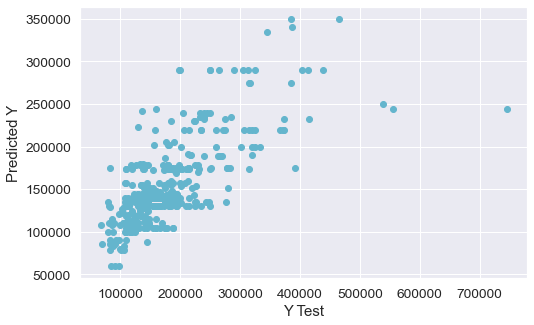

In [60]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, knn_predictions,c='c')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#### KNN - Regressor

In [61]:
from sklearn.neighbors import KNeighborsRegressor

In [62]:
n_neighbors = 20
neigh = KNeighborsRegressor(n_neighbors)
neigh.fit(X_train, y_train)
neigh_predictions = neigh.predict(X_test)

In [63]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(neigh, X_train, y_train, scoring="neg_mean_squared_error", cv=folds)
mse = mean_squared_error(y_test, neigh_predictions)
print(f"Mean score of KNN Regression: {np.mean(scores)}")
print(f"RMSE: {np.sqrt(np.mean(np.absolute(scores)))}")
print(f"MSE: {np.mean(np.absolute(scores))}")
scores = cross_val_score(neigh, X_train, y_train, scoring="explained_variance", cv=folds)
print(f"Explained variance regression score mean: {np.mean(scores)}")
print(f"R squared: {r2_score(y_test, neigh_predictions)}")
print('MAE:', metrics.mean_absolute_error(y_test, neigh_predictions))
print('MSE:', metrics.mean_squared_error(y_test, neigh_predictions))

Mean score of KNN Regression: -1632453282.4918087
RMSE: 40403.62957076763
MSE: 1632453282.4918087
Explained variance regression score mean: 0.7373190424043092
R squared: 0.7104574108576062
MAE: 25640.528219178083
MSE: 1911536081.0911233


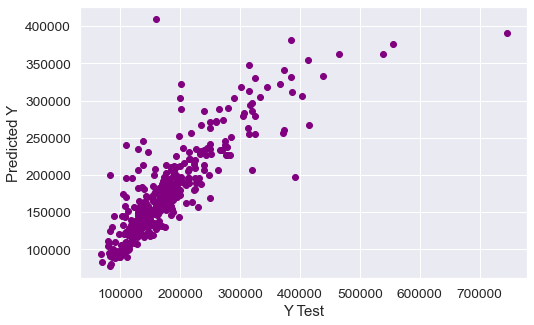

In [64]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, neigh_predictions,c='purple')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#### Naive Bayes

Implementación con filtro de variables

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [66]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

In [67]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(gnb, X_train, y_train, scoring="neg_mean_squared_error", cv=folds)
print(f"Mean score of Naive Bayes: {np.mean(scores)}")
print(f"RMSE: {np.sqrt(np.mean(np.absolute(scores)))}")
print(f"MSE: {np.mean(np.absolute(scores))}")
scores = cross_val_score(gnb, X_train, y_train, scoring="explained_variance", cv=folds)
print(f"Explained variance regression score mean: {np.mean(scores)}")
print(f"R squared: {r2_score(y_test, gnb_predictions)}")
print('MAE:', metrics.mean_absolute_error(y_test, gnb_predictions))
print('MSE:', metrics.mean_squared_error(y_test, gnb_predictions))

Mean score of Naive Bayes: -2158013894.6125436
RMSE: 46454.42814859035
MSE: 2158013894.6125436
Explained variance regression score mean: 0.6692845609910162
R squared: 0.6498193043375382
MAE: 30326.71506849315
MSE: 2311863814.7260275


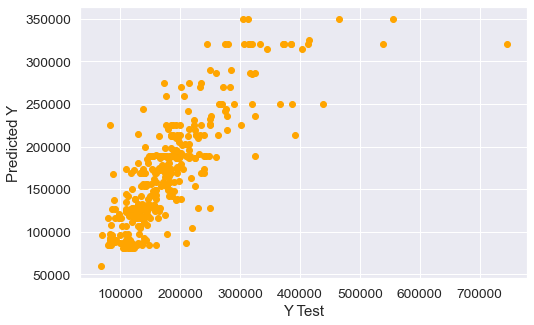

In [68]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, gnb_predictions,c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#### ID3 Decision Tree

In [69]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from id3 import Id3Estimator

In [70]:
classifier = Id3Estimator()
classifier.fit(X_train, y_train)
classifier_prediction = classifier.predict(X_test)

In [71]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(classifier, X_train, y_train, scoring="neg_mean_squared_error", cv=folds)
print(f"Mean score of ID3: {np.mean(scores)}")
print(f"RMSE: {np.sqrt(np.mean(np.absolute(scores)))}")
print(f"MSE: {np.mean(np.absolute(scores))}")
scores = cross_val_score(classifier, X_train, y_train, scoring="explained_variance", cv=folds)
print(f"Explained variance regression score mean: {np.mean(scores)}")
print(f"R squared: {r2_score(y_test, classifier_prediction)}")
print('MAE:', metrics.mean_absolute_error(y_test, classifier_prediction))
print('MSE:', metrics.mean_squared_error(y_test, classifier_prediction))

Mean score of ID3: -2672328061.7770724
RMSE: 51694.56510869467
MSE: 2672328061.7770724
Explained variance regression score mean: 0.634046986588056
R squared: 0.5841412130626238
MAE: 33941.28493150685
MSE: 2745465108.342466


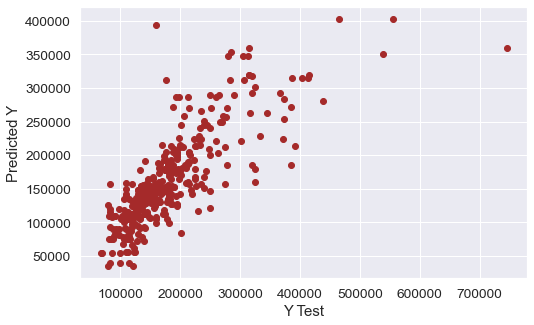

In [72]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, classifier_prediction,c='brown')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#### Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier 

In [74]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
clf_predictions = clf.predict(X_test)

In [75]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(clf, X_train, y_train, scoring="neg_mean_absolute_error", cv=folds)
print(f"Mean score of Decision Tree {np.mean(scores)}")
print(f"RMSE: {np.sqrt(np.mean(np.absolute(scores)))}")
print(f"MSE: {np.mean(np.absolute(scores))}")
scores = cross_val_score(clf, X_train, y_train, scoring="r2", cv=folds)
print(f"Explained variance regression score mean: {np.mean(scores)}")
print(f"R squared: {r2_score(y_test, clf_predictions)}")
print('MAE:', metrics.mean_absolute_error(y_test, clf_predictions))
print('MSE:', metrics.mean_squared_error(y_test, clf_predictions))

Mean score of Decision Tree -30544.52899916597
RMSE: 174.7699316220212
MSE: 30544.52899916597
Explained variance regression score mean: 0.6431507761925934
R squared: 0.6815375118976508
MAE: 30294.775342465753
MSE: 2102462847.6410959


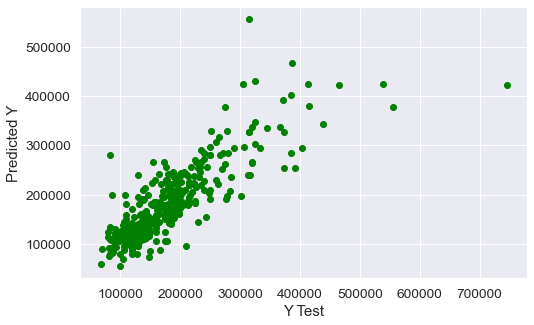

In [76]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, clf_predictions,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#### Linear Regression

In [77]:
from sklearn import linear_model
from sklearn import metrics

In [78]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
lm_predictions = lm.predict(X_test)

In [79]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring="neg_mean_squared_error", cv=folds)
print(f"Mean score of Linear Regression: {np.mean(scores)}")
print(f"RMSE: {np.sqrt(np.mean(np.absolute(scores)))}")
print(f"MSE: {np.mean(np.absolute(scores))}")
scores = cross_val_score(lm, X_train, y_train, scoring="explained_variance", cv=folds)
print(f"Explained variance regression score mean: {np.mean(scores)}")
print(f"R squared: {r2_score(y_test, lm_predictions)}")
print('MAE:', metrics.mean_absolute_error(y_test, lm_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lm_predictions))

Mean score of Linear Regression: -1178891362.7208104
RMSE: 34334.987443143335
MSE: 1178891362.7208104
Explained variance regression score mean: 0.8122486603522198
R squared: 0.666717645688629
MAE: 23649.43874478425
MSE: 2200302371.2130713


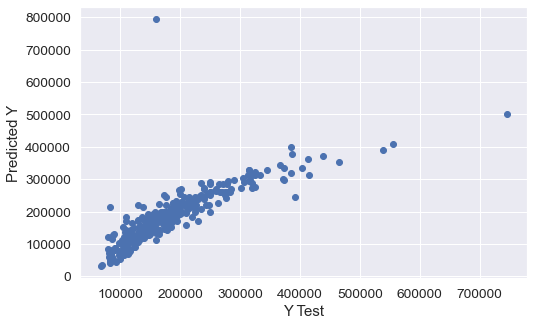

In [80]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, lm_predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#### Decision Tree Regression

In [81]:
from sklearn.tree import DecisionTreeRegressor

In [82]:
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)

In [83]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(dtreg, X_train, y_train, scoring="neg_mean_squared_error", cv=folds)
print(f"Mean score of Decision Tree Regression: {np.mean(scores)}")
print(f"RMSE: {np.sqrt(np.mean(np.absolute(scores)))}")
print(f"MSE: {np.mean(np.absolute(scores))}")
scores = cross_val_score(dtreg, X_train, y_train, scoring="explained_variance", cv=folds)
print(f"Explained variance regression score mean: {np.mean(scores)}")
print(f"R squared: {r2_score(y_test, dtr_pred)}")
print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))

Mean score of Decision Tree Regression: -1798338714.357473
RMSE: 42406.82391263785
MSE: 1798338714.357473
Explained variance regression score mean: 0.7086271326446809
R squared: 0.6857695550119975
MAE: 27360.98904109589
MSE: 2074523251.1424658


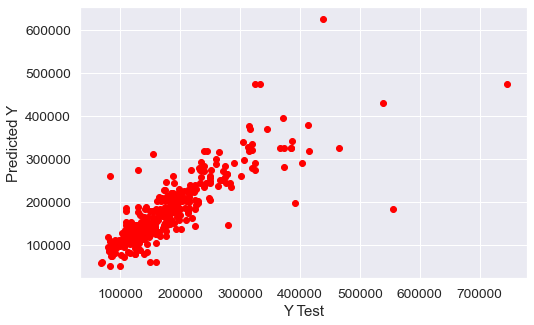

In [84]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test,dtr_pred,c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#### Random Forest Regression

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)
rfr_predict = rfr.predict(X_test)

In [87]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(rfr, X_train, y_train, scoring="neg_mean_squared_error", cv=folds)
print(f"Mean score of Decision Tree Regression: {np.mean(scores)}")
print(f"RMSE: {np.sqrt(np.mean(np.absolute(scores)))}")
print(f"MSE: {np.mean(np.absolute(scores))}")
scores = cross_val_score(rfr, X_train, y_train, scoring="explained_variance", cv=folds)
print(f"Explained variance regression score mean: {np.mean(scores)}")
print(f"R squared: {r2_score(y_test, rfr_predict)}")
print('MAE:', metrics.mean_absolute_error(y_test, rfr_predict))
print('MSE:', metrics.mean_squared_error(y_test, rfr_predict))

Mean score of Decision Tree Regression: -1028150639.4464247
RMSE: 32064.788155333645
MSE: 1028150639.4464247
Explained variance regression score mean: 0.8367108272290279
R squared: 0.8369038710350114
MAE: 18894.070146118724
MSE: 1076747072.4299715


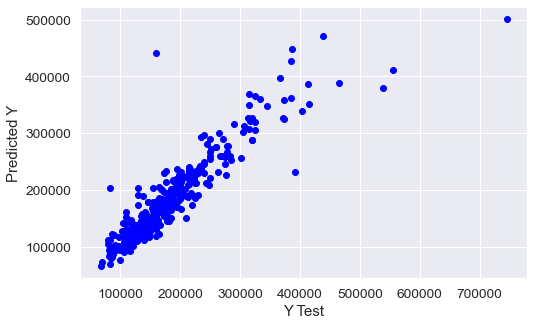

In [88]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, rfr_predict,c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

### Implementación con todos los datos

In [89]:
X_train, X_test, y_train, y_test = train_test_split(train, y_train_data, random_state=0, test_size=0.25)

#### KNN (K Nearest Neighbors)

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [91]:
n_neighbors = 50
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

In [92]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(knn, X_train, y_train, scoring="neg_mean_squared_error", cv=folds)
print(f"Mean score of KNN: {np.mean(scores)}")
print(f"RMSE: {np.sqrt(np.mean(np.absolute(scores)))}")
print(f"MSE: {np.mean(np.absolute(scores))}")
scores = cross_val_score(knn, X_train, y_train, scoring="explained_variance", cv=folds)
print(f"Explained variance regression score mean: {np.mean(scores)}")
print(f"R squared: {r2_score(y_test, knn_predictions)}")
print('MAE:', metrics.mean_absolute_error(y_test, knn_predictions))
print('MSE:', metrics.mean_squared_error(y_test, knn_predictions))

Mean score of KNN: -6451201624.802702
RMSE: 80319.37266190954
MSE: 6451201624.802702
Explained variance regression score mean: 0.16438280193000643
R squared: -0.06801042816389646
MAE: 53136.63287671233
MSE: 7050915979.109589


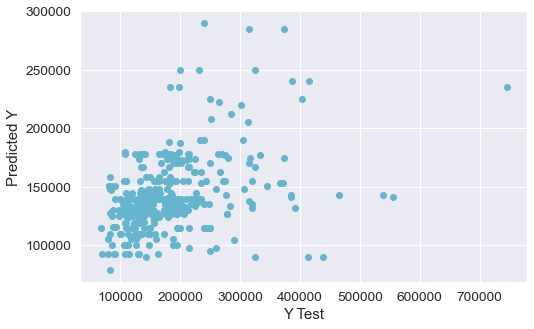

In [93]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, knn_predictions,c='c')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#### KNN - Regressor

In [94]:
from sklearn.neighbors import KNeighborsRegressor

In [95]:
n_neighbors = 20
neigh = KNeighborsRegressor(n_neighbors)
neigh.fit(X_train, y_train)
neigh_predictions = neigh.predict(X_test)

In [96]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(neigh, X_train, y_train, scoring="neg_mean_squared_error", cv=folds)
mse = mean_squared_error(y_test, neigh_predictions)
print(f"Mean score of KNN Regression: {np.mean(scores)}")
print(f"RMSE: {np.sqrt(np.mean(np.absolute(scores)))}")
print(f"MSE: {np.mean(np.absolute(scores))}")
scores = cross_val_score(neigh, X_train, y_train, scoring="explained_variance", cv=folds)
print(f"Explained variance regression score mean: {np.mean(scores)}")
print(f"R squared: {r2_score(y_test, neigh_predictions)}")
print('MAE:', metrics.mean_absolute_error(y_test, neigh_predictions))
print('MSE:', metrics.mean_squared_error(y_test, neigh_predictions))

Mean score of KNN Regression: -2511104088.4087596
RMSE: 50110.91785637896
MSE: 2511104088.4087596
Explained variance regression score mean: 0.6079415336032798
R squared: 0.6067751684440323
MAE: 30840.937671232878
MSE: 2596037618.253637


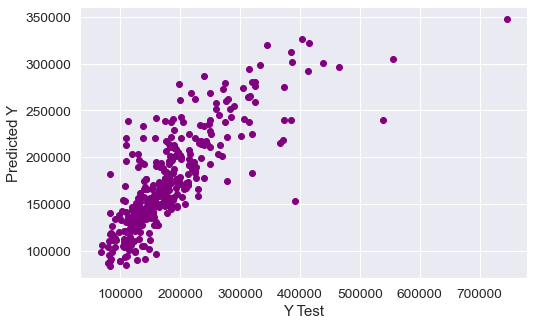

In [97]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, neigh_predictions,c='purple')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#### Naive Bayes

Implementación con filtro de variables

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [99]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

In [100]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(gnb, X_train, y_train, scoring="neg_mean_squared_error", cv=folds)
print(f"Mean score of Naive Bayes: {np.mean(scores)}")
print(f"RMSE: {np.sqrt(np.mean(np.absolute(scores)))}")
print(f"MSE: {np.mean(np.absolute(scores))}")
scores = cross_val_score(gnb, X_train, y_train, scoring="explained_variance", cv=folds)
print(f"Explained variance regression score mean: {np.mean(scores)}")
print(f"R squared: {r2_score(y_test, gnb_predictions)}")
print('MAE:', metrics.mean_absolute_error(y_test, gnb_predictions))
print('MSE:', metrics.mean_squared_error(y_test, gnb_predictions))

Mean score of Naive Bayes: -3033033740.6008677
RMSE: 55072.98557914641
MSE: 3033033740.6008677
Explained variance regression score mean: 0.5280973876104692
R squared: 0.5109303465643851
MAE: 32549.761643835616
MSE: 3228797157.191781


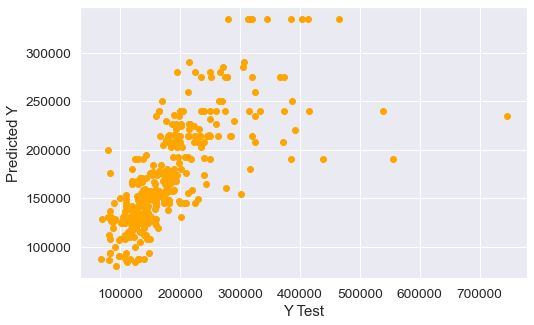

In [101]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, gnb_predictions,c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#### ID3 Decision Tree

In [102]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from id3 import Id3Estimator

In [103]:
classifier = Id3Estimator()
classifier.fit(X_train, y_train)
classifier_prediction = classifier.predict(X_test)

In [104]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(classifier, X_train, y_train, scoring="neg_mean_squared_error", cv=folds)
print(f"Mean score of ID3: {np.mean(scores)}")
print(f"RMSE: {np.sqrt(np.mean(np.absolute(scores)))}")
print(f"MSE: {np.mean(np.absolute(scores))}")
scores = cross_val_score(classifier, X_train, y_train, scoring="explained_variance", cv=folds)
print(f"Explained variance regression score mean: {np.mean(scores)}")
print(f"R squared: {r2_score(y_test, classifier_prediction)}")
print('MAE:', metrics.mean_absolute_error(y_test, classifier_prediction))
print('MSE:', metrics.mean_squared_error(y_test, classifier_prediction))

Mean score of ID3: -2286488090.59583
RMSE: 47817.236333730434
MSE: 2286488090.59583
Explained variance regression score mean: 0.629116391938487
R squared: 0.4674885738061252
MAE: 34533.28767123288
MSE: 3515596126.213699


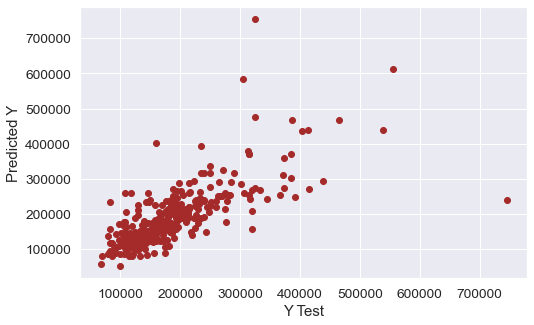

In [105]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, classifier_prediction,c='brown')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#### Decision Tree

In [106]:
from sklearn.tree import DecisionTreeClassifier 

In [107]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
clf_predictions = clf.predict(X_test)

In [108]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(clf, X_train, y_train, scoring="neg_mean_absolute_error", cv=folds)
print(f"Mean score of Decision Tree {np.mean(scores)}")
print(f"RMSE: {np.sqrt(np.mean(np.absolute(scores)))}")
print(f"MSE: {np.mean(np.absolute(scores))}")
scores = cross_val_score(clf, X_train, y_train, scoring="r2", cv=folds)
print(f"Explained variance regression score mean: {np.mean(scores)}")
print(f"R squared: {r2_score(y_test, clf_predictions)}")
print('MAE:', metrics.mean_absolute_error(y_test, clf_predictions))
print('MSE:', metrics.mean_squared_error(y_test, clf_predictions))

Mean score of Decision Tree -32771.536171809836
RMSE: 181.02910310723476
MSE: 32771.536171809836
Explained variance regression score mean: 0.5353073656947387
R squared: 0.5089509494636609
MAE: 33920.098630136985
MSE: 3241864972.1479454


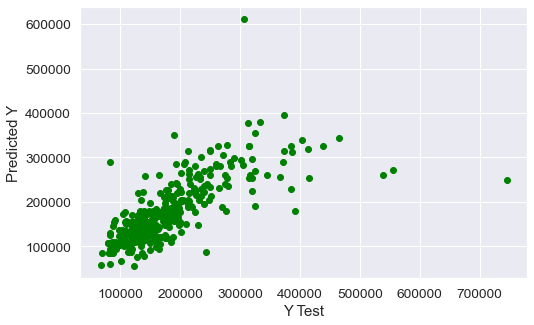

In [109]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, clf_predictions,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#### Linear Regression

In [110]:
from sklearn import linear_model
from sklearn import metrics

In [111]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
lm_predictions = lm.predict(X_test)

In [112]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring="neg_mean_squared_error", cv=folds)
print(f"Mean score of Linear Regression: {np.mean(scores)}")
print(f"RMSE: {np.sqrt(np.mean(np.absolute(scores)))}")
print(f"MSE: {np.mean(np.absolute(scores))}")
scores = cross_val_score(lm, X_train, y_train, scoring="explained_variance", cv=folds)
print(f"Explained variance regression score mean: {np.mean(scores)}")
print(f"R squared: {r2_score(y_test, lm_predictions)}")
print('MAE:', metrics.mean_absolute_error(y_test, lm_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lm_predictions))

Mean score of Linear Regression: -1006262488.3698905
RMSE: 31721.640694798407
MSE: 1006262488.3698905
Explained variance regression score mean: 0.840960273185378
R squared: 0.6167476300570012
MAE: 23311.00548063145
MSE: 2530200256.4791617


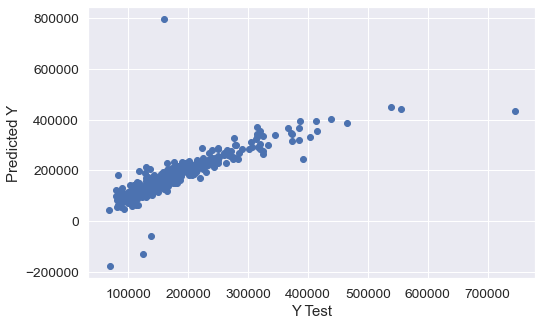

In [113]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, lm_predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#### Decision Tree Regression

In [114]:
from sklearn.tree import DecisionTreeRegressor

In [115]:
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)

In [116]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(dtreg, X_train, y_train, scoring="neg_mean_squared_error", cv=folds)
print(f"Mean score of Decision Tree Regression: {np.mean(scores)}")
print(f"RMSE: {np.sqrt(np.mean(np.absolute(scores)))}")
print(f"MSE: {np.mean(np.absolute(scores))}")
scores = cross_val_score(dtreg, X_train, y_train, scoring="explained_variance", cv=folds)
print(f"Explained variance regression score mean: {np.mean(scores)}")
print(f"R squared: {r2_score(y_test, dtr_pred)}")
print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))

Mean score of Decision Tree Regression: -1494386966.4051292
RMSE: 38657.30159239169
MSE: 1494386966.4051292
Explained variance regression score mean: 0.7518553241981392
R squared: 0.7805015702474901
MAE: 23662.14794520548
MSE: 1449110369.0739727


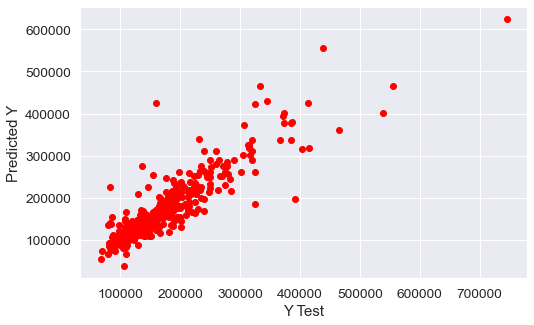

In [117]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test,dtr_pred,c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#### Random Forest Regression

In [118]:
from sklearn.ensemble import RandomForestRegressor

In [119]:
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)
rfr_predict = rfr.predict(X_test)

In [120]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(rfr, X_train, y_train, scoring="neg_mean_squared_error", cv=folds)
print(f"Mean score of Decision Tree Regression: {np.mean(scores)}")
print(f"RMSE: {np.sqrt(np.mean(np.absolute(scores)))}")
print(f"MSE: {np.mean(np.absolute(scores))}")
scores = cross_val_score(rfr, X_train, y_train, scoring="explained_variance", cv=folds)
print(f"Explained variance regression score mean: {np.mean(scores)}")
print(f"R squared: {r2_score(y_test, rfr_predict)}")
print('MAE:', metrics.mean_absolute_error(y_test, rfr_predict))
print('MSE:', metrics.mean_squared_error(y_test, rfr_predict))

Mean score of Decision Tree Regression: -912635974.6973816
RMSE: 30209.865519352807
MSE: 912635974.6973816
Explained variance regression score mean: 0.8550974293296587
R squared: 0.8570629932044361
MAE: 16715.203342465753
MSE: 943658225.2793086


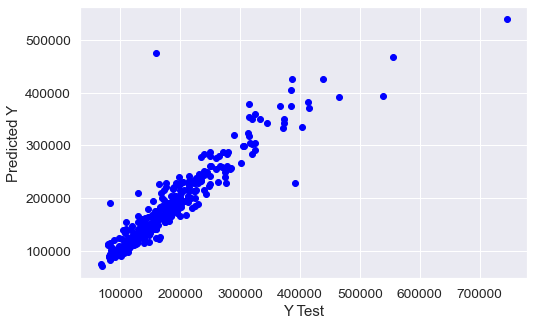

In [121]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, rfr_predict,c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()